# Preliminary Code for Plots

In [1]:
# Loading libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns

# Ignore some annoying warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots

### Population plots

In [2]:
%run ../pop_plots.ipynb

Exception: File `'../pop_plots.ipynb.py'` not found.

### Plots of ML types

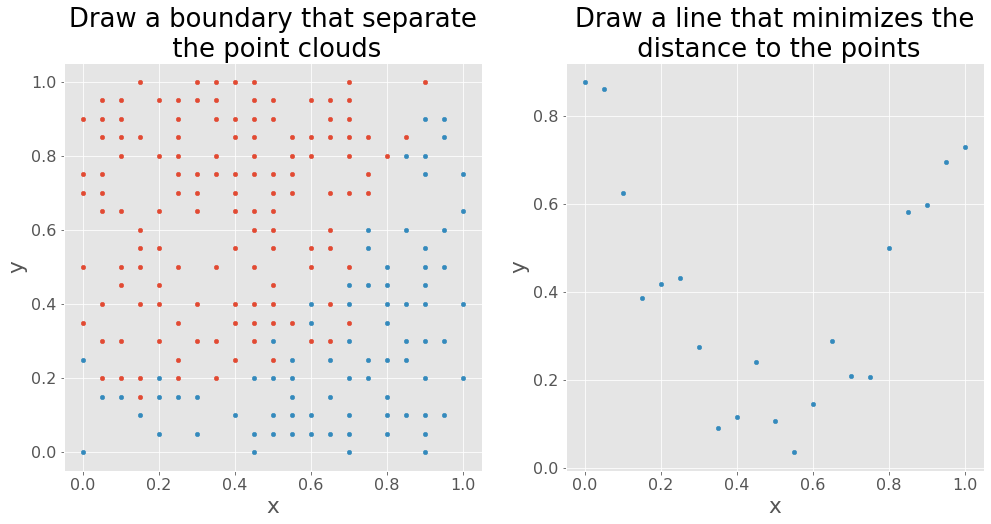

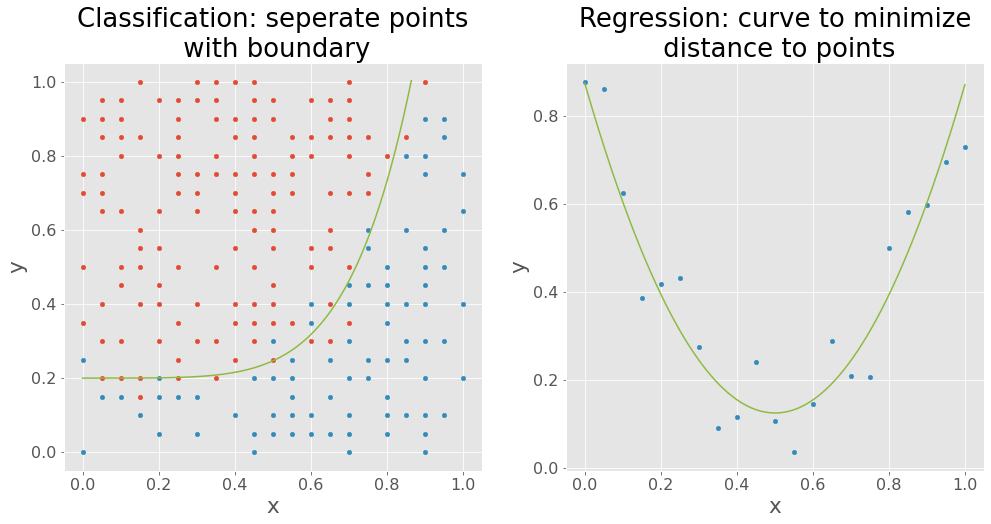

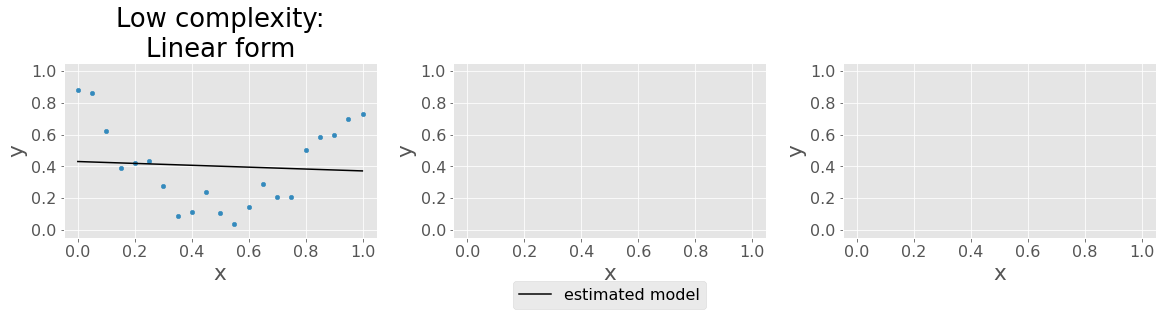

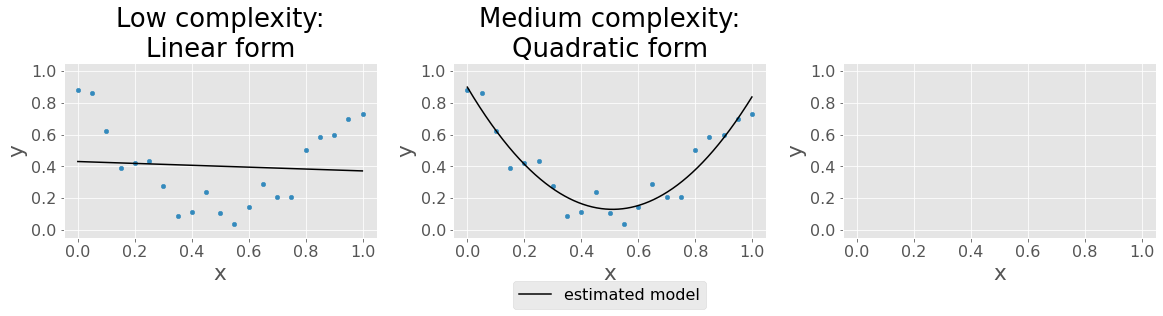

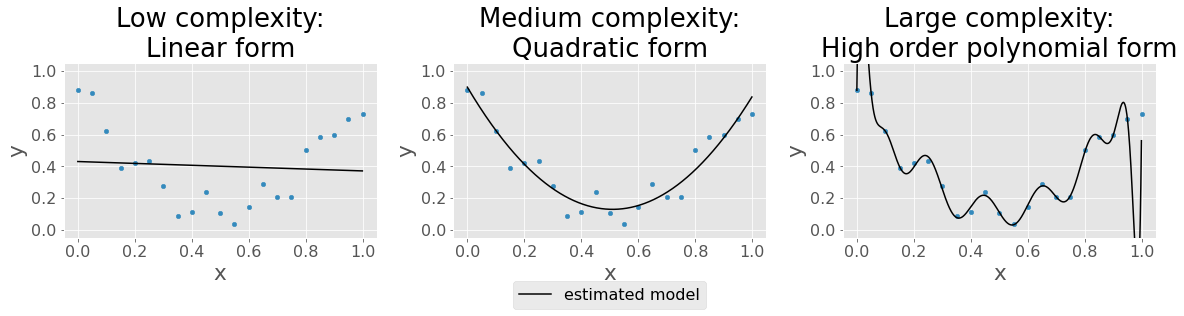

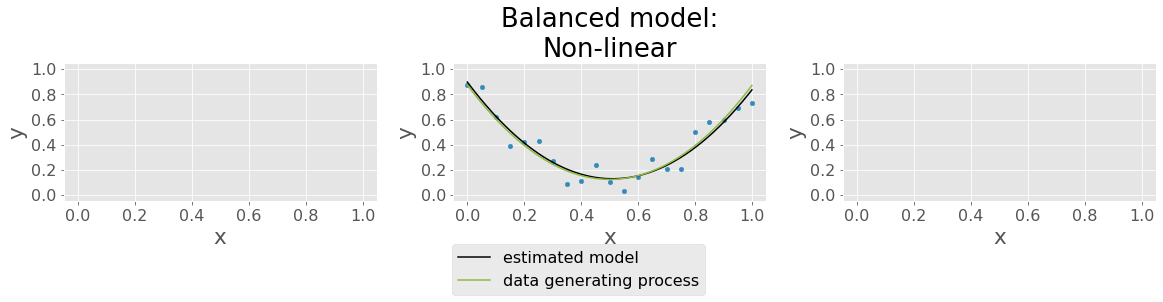

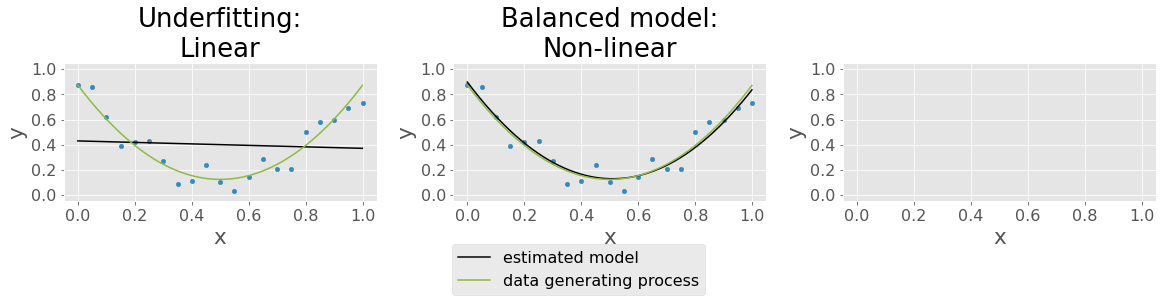

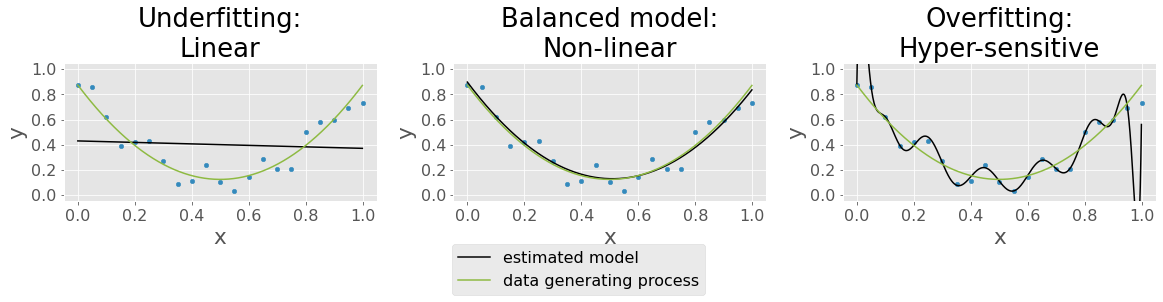

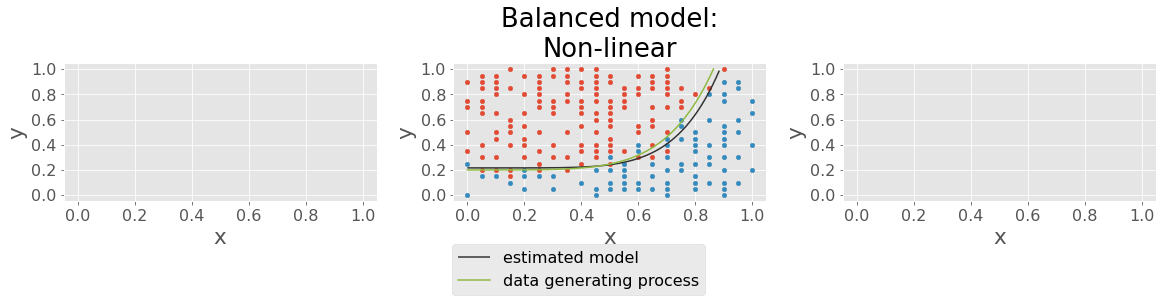

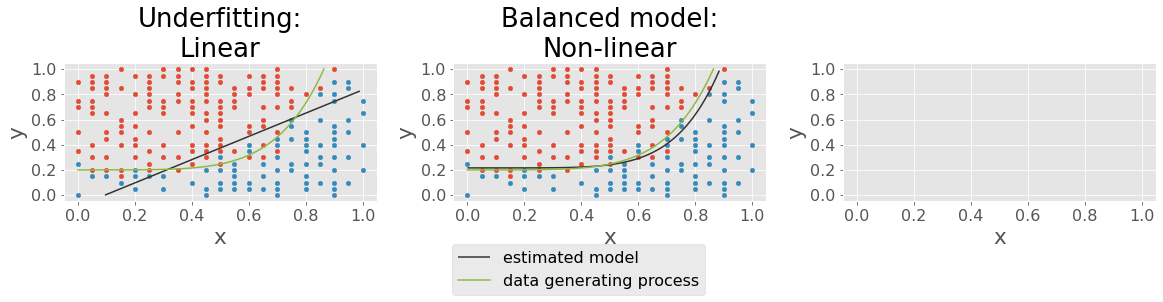

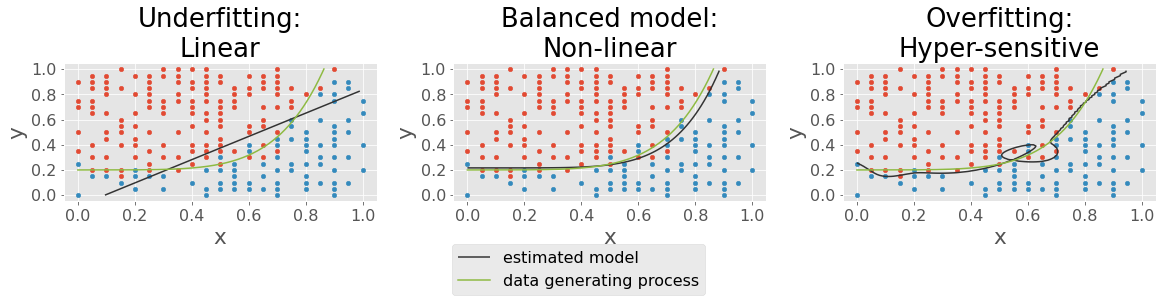

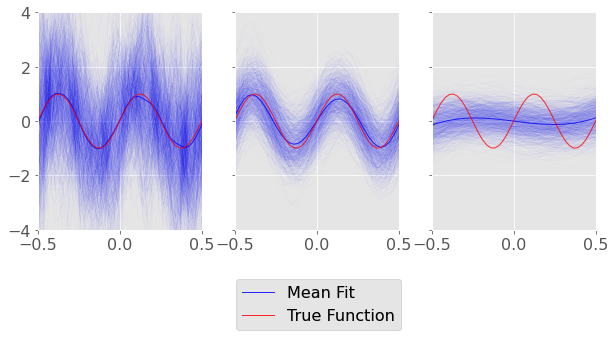

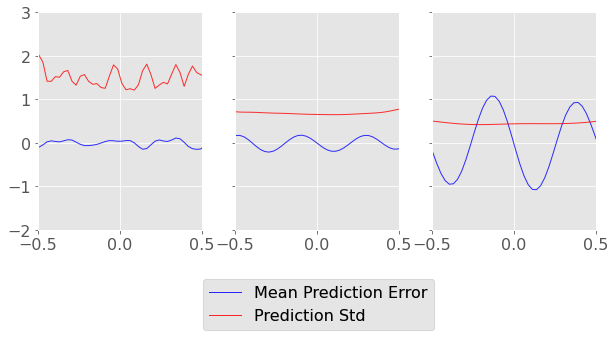

In [3]:
%run ../ML_plots.ipynb

### Code from Raschka 2017

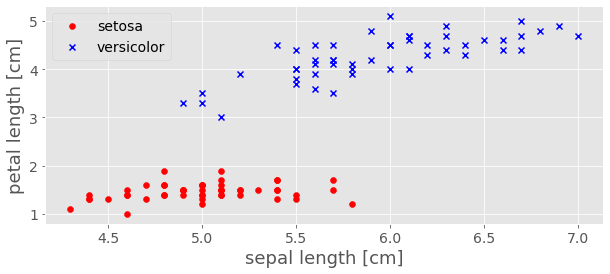

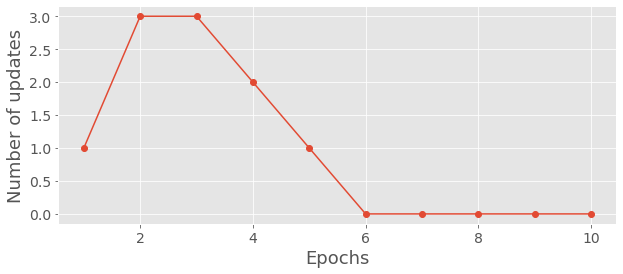

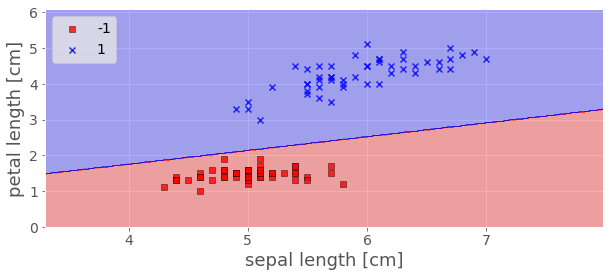

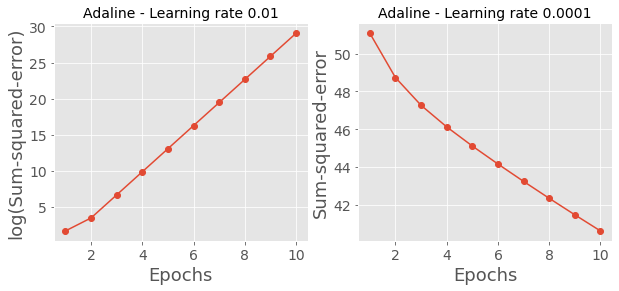

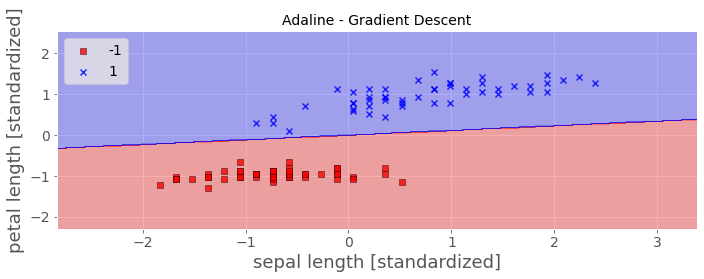

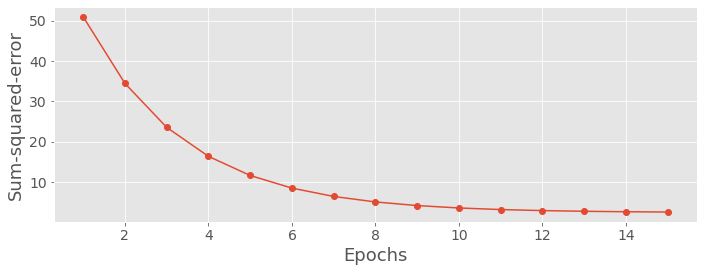

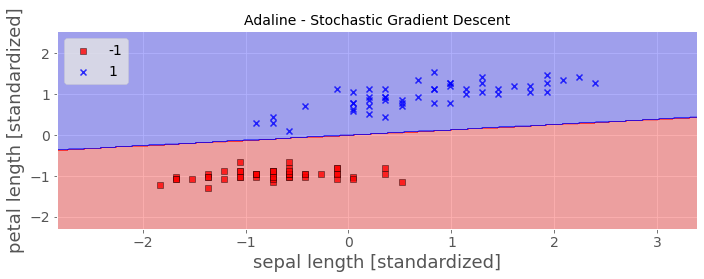

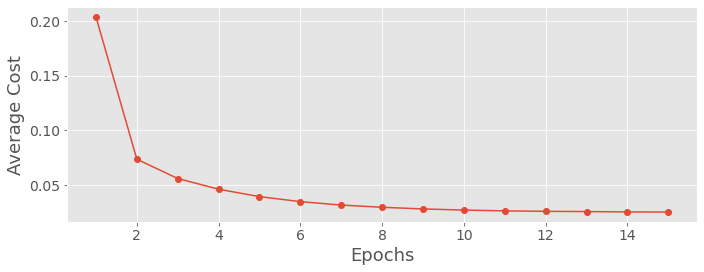

In [3]:
import requests
import os
base_url = 'https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch02/'

for filename in ('ch02.py', 'iris.data', 'iris.names.txt'):
    if not os.path.exists(filename):
        response = requests.get(base_url+filename)
        with open(filename,'wb') as f:
            f.write(response.text.encode('utf-8'))
    
from ch02 import Perceptron, AdalineGD, AdalineSGD, plot_decision_regions

<style>
.rendered_html * + ul {
	margin-top: 0.5em;
}
    div.text_cell_render {
    padding: 0.0em 0.0em 0.0em 0.0em;
}
    .reveal p {
    margin: 20px 10;
    line-height: 1.3;
}
    html, body, .reveal div, .reveal span, .reveal applet, .reveal object, .reveal iframe, .reveal h1, .reveal h2, .reveal h3, .reveal h4, .reveal h5, .reveal h6, .reveal p, .reveal blockquote, .reveal pre, .reveal a, .reveal abbr, .reveal acronym, .reveal address, .reveal big, .reveal cite, .reveal code, .reveal del, .reveal dfn, .reveal em, .reveal img, .reveal ins, .reveal kbd, .reveal q, .reveal s, .reveal samp, .reveal small, .reveal strike, .reveal strong, .reveal sub, .reveal sup, .reveal tt, .reveal var, .reveal b, .reveal u, .reveal center, .reveal dl, .reveal dt, .reveal dd, .reveal ol, .reveal ul, .reveal li, .reveal fieldset, .reveal form, .reveal label, .reveal legend, .reveal table, .reveal caption, .reveal tbody, .reveal tfoot, .reveal thead, .reveal tr, .reveal th, .reveal td, .reveal article, .reveal aside, .reveal canvas, .reveal details, .reveal embed, .reveal figure, .reveal figcaption, .reveal footer, .reveal header, .reveal hgroup, .reveal menu, .reveal nav, .reveal output, .reveal ruby, .reveal section, .reveal summary, .reveal time, .reveal mark, .reveal audio, .reveal video {
    margin-bottom: -1px;
}
    div.text_cell_render {
    padding: 0em 0em 0.5em 0.0em;
}
</style>

# Session 10: Machine Learning Introduction

*Joachim Kahr Rasmussen*

## What Have We Learned Until Now? (I/II)

Python fundamentals (assignment 0)
- Data types: Integers, strings, booleans, etc.
- Containers: Tuples, lists, dicts, etc.
- Loops: For, while
- Functions

Session 2-3: Data structuring in pandas
- The fundamentals:
    - Introduction to DataFrames and Series and native handling of data types
    - Data representation: Column/row navigation and naming
    - Method chaining: Writing something complicated in few lines
- Cleaning and preparation:
    - Combining data: `merge` (key-based) and `concat`/`join` (index-based)
    - Duplicates and missings: `.dropna()`, `.fillna()`, `.drop_duplicates()` and more
    - Data shape: `.stack()`, `.unstack()`
    - Data aggregation: `.groupby()`, *split-apply-combine*

## What Have We Learned Until Now? (II/II)

Session 4: Plotting in Python
- Exploratory vs. explanatory plots
- The grammar of graphics
- `seaborn` vs `matplotlib` vs `pandas`

Session 5-8: Interacting with the Web and scraping
- String operations
- API, HTML
- Regex, Selenium

Session 9: Ethics
- Ethical concers: Privacy, statistical discrimination, business ethics, etc.
- Legal concerns: GDPR, consent to data collection
- Hacking

## Where Are We Now?

Recall the wheel of data science - we are now at the "model" part

<br>
<center><img src='https://raw.githubusercontent.com/hadley/r4ds/master/diagrams/data-science.png' alt="Drawing" style="width: 1000px;"/></center>


# Overview of Session 10

Today, we introduce stastical modelling and the fundamental ideas behind machine learning:

1\. An intro to modelling and machine learning (live)
- Function fitting and prediction vs inference
- Underfitting vs overfitting (bias variance trade-off)
- Supervised, unsupervised and reinforcement learning
- Classification vs regression

2\. The perceptron learning algorithm
- The perceptron in theory
- The perceptron in practice

3\. Model Validation
- Why validation is important
- Test and train split

4\. Beyond the Perceptron
- Different activation functions (linear, logistic)
- Gradient descent and onvergence to local/global minimum

# Associated Readings

PML is a great textbook for learning ML with python. For today, you should have looked into three chapters:

PML, chapter 1:
- Basic terminology and ML lingo
- Introduction to the three classes of machine learning
- Using Python for machine learning

PML, chapter 2:
- Introduction to artificial neurons
- The perceptron learning algorithm
- Gradient descent for convergence to global/local minimum
- Altering the activation function

PML, chapter 3, section "Modeling class probabilities via logistic regression":
- Reverting to logistic regression as a machine learning approach
- Training a logistic regression model with `scikit-learn` in python
- Dealing with *overfitting*


# Why We Use Models

## Function Fitting
*What does (supervised) machine learning do?*

Suppose that....
- we have data with some outcome $y$, and
- we want to model/predict this outcome from (a $d\times1$-dimensional matrix/vector of) input features $\mathbf{x}$.

The aim is now to find a function $f$ such that the distance between actual values $y$ and predicted values $f(x)$ are minimized.

*What are some examples used in social sciences?*

- Linear form: $y=x^T\beta$.
- Non-linear form: $y=g(x^T\beta)=1/\left(1+\text{e}^{-\boldsymbol{x}^T\boldsymbol{\beta}}\right)$, e.g. $g$ is a logistic function

where $x$ is a 1-dimensional array of numbers, e.g.
\begin{align}\boldsymbol{x}=[x_0,x_1,x_2,..,x_d]\end{align}

and $x^T\beta=\beta_0+x_1\beta_1+x_2\beta_2+...+x_d\beta_d$ (a linear index / vector dot product)




## Why We Bother

*Why not just stop at visualization?* 

Models combined with formalized statistical methods allow us to:
- get qualified answer about hypothesis using statistics, i.e. causal inference and policy evaluation
- predict things, e.g. sales tomorrow, spread of epidemics, weather
- think about much more complicated relationships than what we can possibly eyeball in a graph

*Do we all bother for the same reasons?*

No, models are pursued with differens aims. Suppose we have a linear model, $y=x\beta+\epsilon$.
- A social scientist would generally say:
    - Models teach us something about the world.
    - We want to estimate $\hat{\beta}$ and potentially a distribution
    - Can we make causal inference?
- A data scientist would generally say:
    - Models help us make optimal future decisions and precise predictions, i.e. $\hat{y}$, on new data.  

## Model Fragility (I/V)
Whatever your profession is, you should care about model fragility $-$ or *overfitting*.

To understand this problem, *polynomial regression* is an illustrative starting point:
- Suppose that, for a start, you only have one feature $x$.
- Now, transform this feature into an $n+1$-dimensional polynomial such that  
    $$\boldsymbol{x}=\begin{array}{ccccc}
[1, & x, & , x^2 & \ldots, & x^n\end{array}]^T$$
- By choosing $n$ large enough, you can effectively fit any "regular" curve (similar intuition to high-dimensional Taylor approximations).

## Model Fragility (II/V)

An example: Suppose we build a set of simple models of the population size in Denmark using polynomial regression with different *n*. How do the models perform?
- Fetch data on population sizes in DK from Statistics Denmark.
- Estimate the models with data from 1769-1975...

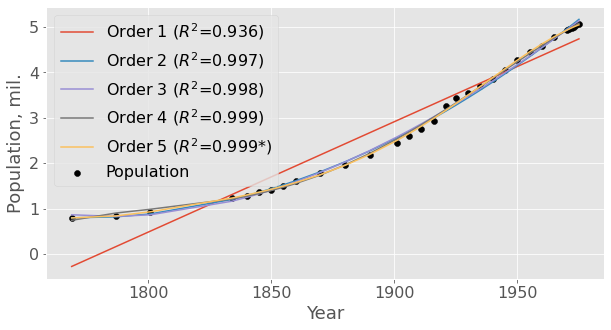

In [5]:
f_pop1

## Model Fragility (III/V)

Clearly, higher order polynomials $\Rightarrow$ better fit! We may say that the in-sample performance increases in *n*.

*Great news! Let's just make some complicated models and get going?*

Stop! Suppose we now want to use these models to predict population sizes until 2021...

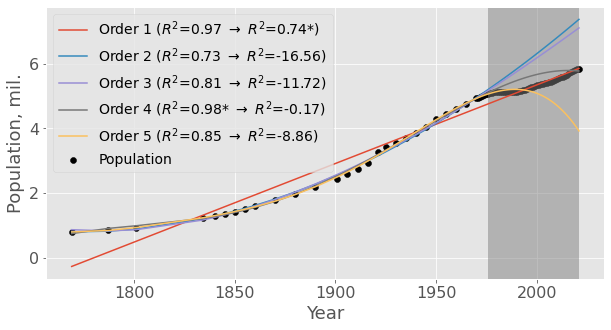

In [6]:
f_pop2

## Model Fragility (IV/V)

The conclusion is clearly different. We may say that the out-of-sample performance decreases in *n*.

By 2050, Denmark will be deserted...

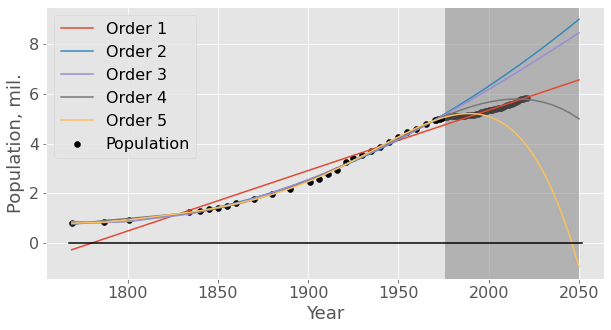

In [7]:
f_pop3

## Model Fragility (V/V)

*What trade-off do we face in making models?*

In general, we say that there are two opposing forces to take into account:
- **Underfitting**: Making a model that is too simple and does not capture enough of data (low *n*)
- **Overfitting**: Making a model with great fit on estimation data, but poor out-of-sample prediction (high *n*).

**General problem**: Fitting a model to idiosyncratic noise / spurious correlations.

**The goal of machine learning**: Find models that balances these two problems!

**Note:** This trade-off actually shows up in many situations where thoughts are guided by inductive reasoning.

## What is Machine Learning
*Can you define ML in a very simple way?*

We need to define the three different main paradigms of ML separately:

- Supervised learning
  - Models designed to infer a relationship between input and **labeled** data.      
  - We define the **target** as labels in data that we wish to model (e.g.  population as a function of year)

- Unsupervised learning
  - Find patterns and relationships from **unlabeled** data. 
  - This may involve clustering, dimensionality reduction and more.  
  - *Not part of the course*.

- Reinforcement learning
  - Models to infer optimal behavior in some (potentially) mathematically unknown environment
  - Needs no labeling, and suboptimal behavior is corrected through experience (penalty/reward).
  - *Not part of the course*.

## Machine Learning  for Us
*How might this be useful for social scientists?*

Supervised ML is the most **commonly used** of the three paradigms in social sciences, and it is important in this specific field because (elaborated in lecture 14):
- It can improve estimation by **validating models** (not only theory)
- It can **generate new data** (i.e. impute missing)
- It can help us make better (and more flexible!) **predictive models** (finance, macro, demography/education, combat fraud)
- It can be used in hybrid models that leverage machine learning for **causal estimation** (e.g. causal forests, neural estimation, etc.)

## Machine Learning Outline for This Course 

**ML**: Convenient shorthand notation for machine learning.

- **Supervised learning** vs unsupervised learning (vs reinforcement learning)
- **Linear** supervised ML models 
    - classification and regression
    - regularization 
    - **getting hands dirty with implementing solver**
- Fundamental **concepts** of ML
    - overfitting, underfitting, model validation
    - model selection and hyperparameters
- Emphasize differences and synergies between **ML and statistics**
- Brief intro to **non-linear models**

## Supervised ML Problems (I/III)
*How can we categorize different types of supervised ML models?*


Suppose we have model, $y=f\left(x^T\beta\right)$

We then distinguish different models by the `target`variable `y`:

- Regression:
    - Predict a numeric value (the target can be thought of as ’continuous’)
    - Target data type will typically be float or int
    - Example of targets:  income, life expectancy, education length (years)

- Classification:
    - Distinguish between non-numeric target categories (the target is binary or a catagory/factor)
    - Target data type can be be str, bool or int
    - Examples of target:  kind of education (linguistics, math), mode of transportation

## Supervised ML Problems (II/III)
*Which one is classification, which one is regression?*

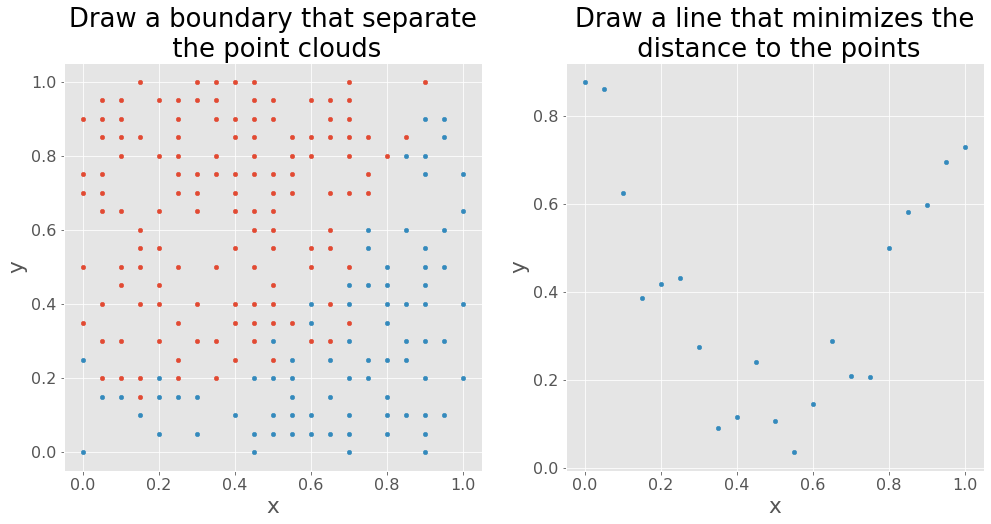

In [8]:
f_identify_question

## Supervised ML Problems (III/III)

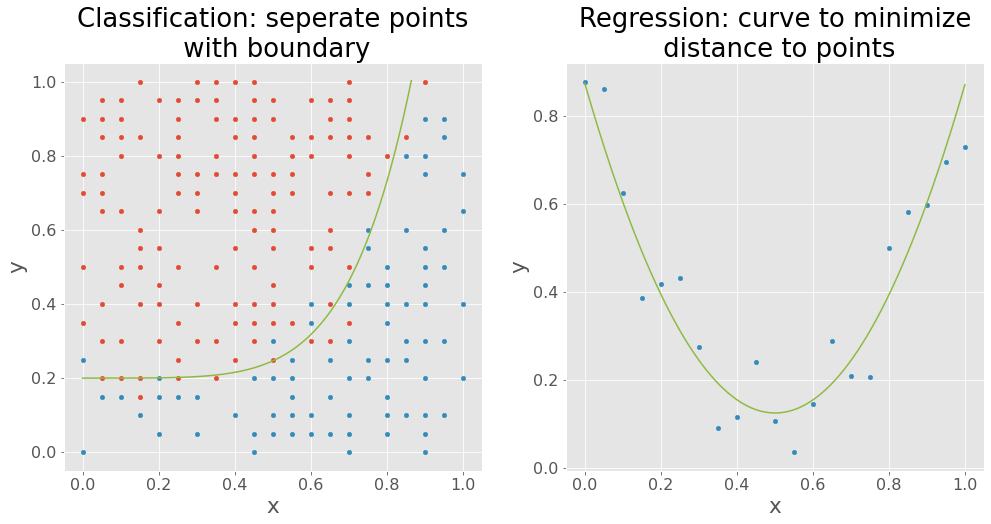

In [9]:
f_identify_answer

## Another Question for You
*Classification or regression?*

Consider the following procedure:
- We load the titanic data. 
- We select variables and make dummy variables from categorical (note: only `class` is categorical)
- We split into target and features. 

Target is: ...? And input features are: ...?

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
cols = ['survived','class', 'sex', 'sibsp', 'age', 'alone']
titanic_sub = pd.get_dummies(titanic[cols].dropna(), drop_first=True).astype(np.int64)  

X = titanic_sub.drop('survived', axis=1)
y = titanic_sub.survived

# Video and Exercises

In the combined teaching module and exercise set, you will get your first taste of how machine learning algorithms are constructed. 

In particular:
- implement a [_perceptron_](https://en.wikipedia.org/wiki/Perceptron) model from scratch using the matrix-algebra library NumPy
- train this model on the iris data to predict flower types. 

# VIDEO 10.1: The Perceptron Model 

## ML Lingo

Before diving into the perceptron model, we must define three terms that will be usedrepeatedly:

- Feature vector:
    - A row of input variables, $\mathbf{x}_i$
    - Equivalent to *independent variables* in econometrics/statistics

- Weight vector:
    - A set of model parameters, $\boldsymbol{w}$
    - Equivalent to *coefficients* in econometrics/statistics

- Bias term:
    - The model intercept, $w_0$
    - Equivalent to the contant term, $\beta_0$, in econometrics/statistics

## The Articifial Neuron

*A simple classification model*

A real neuron maps stimulus (input) to output. [Research estimates](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5063692) there are 55–70 billion neurons in the brain.
<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_01.png' alt="Drawing" style="width: 900px;"/></center>


## Model Archicture
*From input to output*

**Purpose:** We are interested in making a decision rule that takes an arbitrary input and outputs either positive or negative.

**Mathematically**: We define this map as $\phi: \mathbb{R}^d\rightarrow\{-1, 1\}$.

**In words:** $\phi\left(.\right)$ is a function that takes a $d$-dimensional input and maps it into a one-dimensional, binary outcome.


More specifically:

\begin{align*}
\phi(z_i)=\begin{cases}
\hfill1, & z_i>0\\
-1, & z_i\le0
\end{cases}
\end{align*}

This consists of:
- The *net-input*, $z_i = \underset{~vector\,form}{\underbrace{\boldsymbol{x}_i^{T}\boldsymbol{w}}} = \underset{~expanded\,form}{\underbrace{1\cdot w_0+w_1x_{i,1}+...+w_d x_{i,d}}}$
- A unit *step function*, $\phi$, that checks if value exceeds threshold

## Visualizing the Decision Boundary
*The unit step function (left) and the decision boundary (right)*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_02.png' alt="Drawing" style="width: 1000px;"/></center>


## A Good Model?
*When does the articial neuron work?*


When the two target types are linearly separable:

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_03.png' alt="Drawing" style="width: 1200px;"/></center>


## Computing Model Weights
*How do we estimate the model parameters?*

In short, the approach is the following:

- Step 1: Initialize the weights with some set of small random numbers, $\boldsymbol{\hat{w}}_{0}$
    
- Step 2: Set $k=1$ and repeat until no mistake on training data (complete separation): For each training observation, $i=1,2,...,n$:
    1. Given $\boldsymbol{\hat{w}}_{k-1}$, predict target $\hat{y}_i$
    2. Update weight $\boldsymbol{\hat{w}}_{k}$ as a function of $\boldsymbol{\hat{w}}_{k-1}$, $y_i$ and $\boldsymbol{x_i}$
    
*Note:* While looping through your data the first time, $k=i$, if only using one observation at a time.
  

## Predicting the Target
*How do we compute the predicted target $\hat{y}$? (step 2.1)*

We apply a transformation of the net-input:
- single observation, expanded notation:
\begin{align*}
\hat{y}_i= \phi(z_i),\quad z_i=w_0+w_1x_{i,1}+...+w_{d}x_{i,d}
\end{align*}

- single observation, vector notation:
\begin{align*}
\hat{y}_i= \phi(z_i),\quad z_i=\boldsymbol{w}^{T}\boldsymbol{x}_i
\end{align*}


- multiple observations, matrix notation:
\begin{align*}
\hat{\boldsymbol{y}}= & \phi(\boldsymbol{z}),\quad\boldsymbol{z}=\boldsymbol{X}\boldsymbol{w}
\end{align*}

## The Perceptron Learning Rule
*How do we update weights (step 2.2)?*

Weights are updated as follows with one observation:
\begin{align*}
\boldsymbol{w}_k&=\boldsymbol{w}_{k-1}+\Delta \boldsymbol{w}_{k}\\
\Delta\boldsymbol{w}_{k}&=\eta \cdot\left(y_{i}-\phi\left(z_{i}\right)\right) \cdot \boldsymbol{x}_{i}
\end{align*}

where $\eta$ is the learning rate. Clearly, there is only adjustment when $y_i\neq\hat{y}_i$.

If multiple observations, we can use vector notation:
\begin{align*}
\boldsymbol{w}_k&=\boldsymbol{w}_{k-1}+\Delta \boldsymbol{w}_{k}\\
\Delta\boldsymbol{w}_{k}&=\eta\cdot X^T(y-\phi(z))
\end{align*}

## Overview of the Perceptron Learning Rule 


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_04.png' alt="Drawing" style="width: 1000px;"/></center>


# VIDEO 10.2: Implementation of The Perceptron Model 

## Implementation in Python (I/III)
*Let's set some values of input and output* 

In [11]:
X = np.random.normal(size=(3, 2)) # feature matrix
y = np.array([1, -1, 1]) # target vector
w = np.random.normal(0,0.001, size=(3)) # weight vector
print('X:\n',X)
print('y:',y)
print('w:',w)

X:
 [[-0.66852589  0.08656566]
 [-1.32939263 -0.11881394]
 [ 0.2439096   0.24687993]]
y: [ 1 -1  1]
w: [ 6.47846693e-05 -1.14146553e-03 -1.04875747e-04]


## Implementation in Python (II/III)
*How do we compute the errors vectorized?* 

In [12]:
# compute net-input 
z = w[0] + X.dot(w[1:]) # (w[0]: bias, w[1:]: other weights, X: features)

# unit step-function
positive = z>0 # compute prediction (boolean)
y_hat = np.where(positive, 1, -1)  # convert prediction

# compute errors
e = y - y_hat # compute errors

## Implementation in Python (III/III)
*How do we compute the updated weights?*

In [13]:
# learning rate
eta = 0.001 

# update weights 
w[1:] += eta*X.T.dot(e) 
w[0] += eta*e.sum()/2

## Implementation in Python (IV/III)
Repeating steps in a loop:

In [14]:
X = np.random.normal(size=(3, 2)) # feature matrix
y = np.array([1, -1, 1]) # target vector
w = np.random.normal(0,0.001, size=(3)) # weight vector

# learning rate
eta = 0.0001 

error = np.inf
k = 1

while error>0:
    z = w[0] + X.dot(w[1:])
    positive = z>0
    
    y_hat = np.where(positive, 1, -1)
    e = y - y_hat
    
    w[1:] += eta*X.T.dot(e) 
    w[0] += eta*e.sum()/2
    
    error = 1/2*abs(y-y_hat).sum()    
    
    if k == 1:
        print(k,y-y_hat, w)
        
    k += 1

print(k-1,y-y_hat, w)

1 [2 0 2] [-1.39253793e-03  3.45752761e-05 -3.10259534e-04]
9 [0 0 0] [-1.92537930e-04 -4.86994498e-05  1.02513420e-03]


## Working with the Perceptron (I/IV)
First, we load the *iris* data and plot with `seaborn`:

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

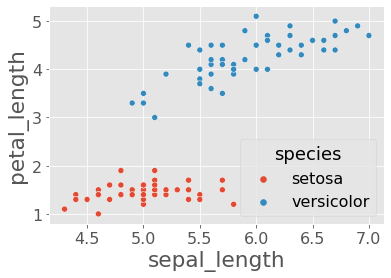

In [15]:
iris = sns.load_dataset('iris').iloc[:100] # drop virginica species
sns.scatterplot(iris.sepal_length, iris.petal_length, hue=iris.species)

Features and target

In [16]:
X = iris.iloc[:, [0, 2]].values # keep petal_length and sepal_length
y = np.where(iris.species=='setosa', 1, -1) # convert to 1 for setosa, -1 for versicolor

## Working with the Perceptron (II/IV)
*How do we fit the perceptron model?* (load perceptron code [here](#Code-from-Raschka-2017)). 

In [17]:
clf = Perceptron(n_iter=20, eta=0.000001) # initialize the perceptron 
# clf: short for classifier (classification model), 
# n_iter: number of times to run through all observation
# eta: learning rate (very low for purposes of illustration)

clf.fit(X,y) # fit the perceptron (estimate the model on training data)

## Working with the Perceptron (III/IV)
*How can we evaluate the model??*

Number of errors: 0


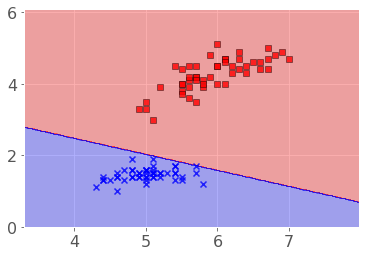

In [18]:
print('Number of errors: %i' % sum(clf.predict(X)!=y))

# we plot the decisions
plot_decision_regions(X,y,clf)

## Working with the Perceptron (IV/IV)
*How does the model performance change with the number of iterations?*

[ 0.01709945 -0.00179576 -0.00401032]


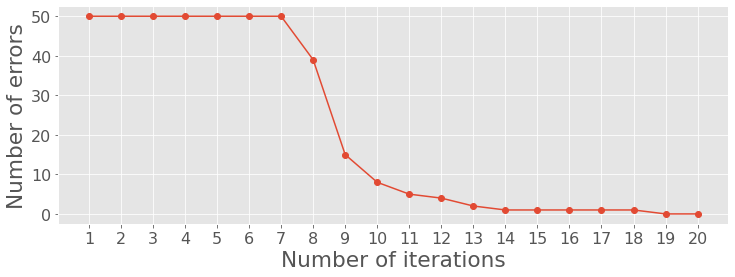

In [19]:
f,ax = plt.subplots(figsize=(12, 4))
ax.set_xticks(range(21))
ax.plot(range(1, len(clf.errors_) + 1), clf.errors_, marker='o')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Number of errors')


print(clf.w_)

# VIDEO 10.3: Simple Model Validation

## Model Validation
*How can we see how our model generalizes?*

After all, we have only learned a rule that minimizes prediction error on known data $\Rightarrow$ No reason to believe that performance is equally good outside this sample...

Solution: We can simulate out-of-sample prediction.  But how?

- Idea: Use some of our sample for model evaluation.
- Implementation - divide data randomly into two subsets:
    - `training data` for estimation; 
    - `test data` for evaluation.
- Note: does not work for time series... Solution is *back-testing*.



## Random Partitioning
Revert back to the *Titanic* data. Let...
- *y* be the target denoting survived
- *X* be the features reflecting everything else

In [20]:
X = titanic_sub.drop('survived', axis=1).values
y = titanic_sub.survived.replace(0,-1).values
X[:5], y[:5]

(array([[ 1, 22,  0,  0,  1,  1],
        [ 1, 38,  0,  0,  0,  0],
        [ 0, 26,  1,  0,  1,  0],
        [ 1, 35,  0,  0,  0,  0],
        [ 0, 35,  1,  0,  1,  1]], dtype=int64),
 array([-1,  1,  1,  1, -1], dtype=int64))

We split the data into test and training samples:

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=161193)

## The Value of Training
Evaluate performance on test data:

In [23]:
for n in range(11):
    clf2 = Perceptron(n_iter=max(50*n,1), eta=0.0001, random_state=161193) 
    clf2.fit(X_train, y_train)
    acc = np.mean(y_test-clf2.predict(X_test)==0)
    print(max(50*n,1), acc)

1 0.34965034965034963
50 0.46153846153846156
100 0.7692307692307693
150 0.3706293706293706
200 0.35664335664335667
250 0.6993006993006993
300 0.7482517482517482
350 0.7482517482517482
400 0.7832167832167832
450 0.7972027972027972
500 0.7972027972027972


Note: Training data is not seperable, so early stopping is important (and convergence not stable $-$ see this [answer](https://datascience.stackexchange.com/questions/39213/why-perceptron-does-not-converge-on-data-not-linearly-separable) for more info)

# VIDEO 10.4: Beyond the Perceptron

## Reflections

*What might we change about the perceptron?*

Lots of things...  But two obvious elements:
1. Change from updating errors that are binary to continuous
2. Use more than one observation a time for updating

*What else might we use to update errors?*

Use transformation of the net-input:
- The most simple is **no transformation** of the net-input, i.e. $\phi(z_i)=z_i$.
- When we change this from perceptron we call it Adaptive Linear Neuron (**Adaline**).

## The Linear Activation Function
*How is this different from the Perceptron?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_09.png' alt="Drawing" style="width: 800px;"/></center>


## Alternative Activation Functions
*Which alternative activation functions can be used?*

See page 450 in PML, but these are among the common ones:
- Linear 
- Logistic (Sigmoid)

## Adaline and Logistic Regression
*How do Adaline and Logistic regression differ?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch03/images/03_03.png' alt="Drawing" style="width: 800px;"/></center>


## The New Object
*The update rule in perceptron seems ad hoc, is Adaline more general?*

- Yes, we minimize the sum of squared errors (SSE). The SSE for Adaline is:
\begin{align}SSE&=\boldsymbol{e}^{T}\boldsymbol{e}=e_1^2+..+e_n^2\\\boldsymbol{e}&=\textbf{y}-\textbf{X}\textbf{w}\end{align}

*Doesn't the above look strangely familiar?*

- Yes, it is the same objective as OLS. The difference:
    - OLS computes the exact solution with system of equations from first order conditions
    - We make an approximate solution

## Approximating a Solution
*But how do we make such approximate solution?*

- There are two general classes:
  -  We approximate the first order derivative ~ gradient descent (GD)
  -  We approximate both first and second order derivative ~ quasi Newton    
 <br />
- We will use gradient descent...
   - Much simpler, and you will often wee it in applied work
   - But often, it is also slower

## Gradient Descent Illustrated
*How does a gradient descent look?*

An algorithm that finds the direction where expected differences are largest. Attempt of satisfying first order conditions (FOC).

<center><img src='https://upload.wikimedia.org/wikipedia/commons/7/79/Gradient_descent.png' alt="Drawing" style="width: 350px;"/></center>


## The Gradient
*What is the first order derivative of SSE wrt. weights in Adaline?*

\begin{align}\frac{\partial SSE}{\partial w}=-\textbf{X}^T\textbf{e},\end{align}


*And how do we update with GD in Adaline?*

  - Idea: take small steps to approximate the solution.

  - $\Delta w=-\eta\left(-\textbf{X}^T\textbf{e}\right)=\eta\cdot\textbf{X}^T(\textbf{y}-\hat{\textbf{y}})$

## Variations of Gradient Descent
The gradient descent algorithm that we just learned uses the whole data.
- Often known as batch gradient descent.

*What might be a smart way of changing (batch) gradient descent?*

- We only use a subset of the data. Two variants:
    - *stochastic gradient descent* (SGD): uses random subset of observations
    - *mini batch*: uses deterministic subset of observations (loop whole data set)
    
- Idea: we converge faster by computing update for subset of data
    - Note: we may need a million repetitions or more.

## Applying Logistic Regression
*How difficult is it to use `LogisticRegression`?*

Very easy:

In [24]:
from sklearn.linear_model import LogisticRegression

# estimate model on train data, evaluate on test data
clf = LogisticRegression(solver='lbfgs') # note try default values

clf.fit(X_train,y_train) # model training

y_hat = clf.predict(X_test) # Use model to predict test target
accuracy = (y_hat==y_test).mean() # Evaluate performance

print('Model accuracy is:', np.round(accuracy,3))

Model accuracy is: 0.825
